# Linear Regression 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def compute_cost(X, y, theta):
    '''
    compute a cost function value for a linear regression. 
    '''
    pred = np.matmul(X,theta)
    error = np.subtract(pred, y)
    sq_error = np.power(error, 2)
    mean_sq_error = np.mean(sq_error) / 2

    return mean_sq_error

def gradient_descent(X, y, theta, iteration, learning_rate, verbose=False):
    
    # cost_values history
    cost_hist = []

    # for each iteration
    for i in range(iteration):

        # Update all thetas based on the error of the previous step.
        # When multiply matrix in numpy, please be careful with the shape of the array
        # Array shape (1,) doesn't have the same behavior as (1,1) shape.
        n = X.shape[1]
        h = np.matmul(X, theta).reshape(-1,1)
        e = np.subtract(h, y).reshape(-1,1)
        for j in range(n):
            gradient = np.mean(e * X[:,j].reshape(-1,1))
            theta[j] = theta[j] - (learning_rate * gradient)
        
        cost = compute_cost(X, y, theta)
        cost_hist.append(cost)

        if verbose:
            if not i % 500 or i == iteration-1:
                print(f"{gradient=}")
                print(f"Iteration : {i}, theta : {theta[0][0], theta[1][0]}, {cost=}")
        
    return theta, cost_hist

# Training data

Before starting on any task, it is often useful to understand the data by visualizing it. 

For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). 

(Many other problems that you will encounter in real life are multi-dimensional and can’t be plotted on a 2-d plot.)

In [3]:
# Read data
data = pd.read_csv('./ex1data1.txt', header=None)

# Prepare data
X, y = data.loc[:,0], data.loc[:,1]
m = len(y)
X, y = np.array(X).reshape(-1,1), np.array(y).reshape(-1,1)

# Add constant value to X
X = np.concatenate((np.ones(m).reshape(-1,1), X), axis=1)

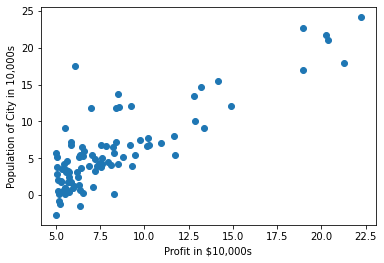

In [4]:
# Scatter plot

plt.scatter(X[:,1],y);
plt.xlabel("Profit in $10,000s");
plt.ylabel("Population of City in 10,000s");

# Compute cost function

As you perform gradient descent to learn minimize the cost function J(θ), it is helpful to monitor the convergence by computing the cost. 

In this section, you will implement a function to calculate J(θ) so you can check the convergence of your gradient descent implementation.

In [5]:
# Compute cost function

cost = compute_cost(X, y, np.array([0, 0]).reshape(-1,1))
print(f"Your compute_cost function returns : {cost:.2f}")
assert round(cost,2) == 32.07

cost = compute_cost(X, y, np.array([-1, 2]).reshape(-1,1))
print(f"Your compute_cost function returns : {cost:.2f}")
assert round(cost,2) == 54.24

Your compute_cost function returns : 32.07
Your compute_cost function returns : 54.24


# Gradient descent


A good way to verify that gradient descent is working correctly is to look at the value of J(θ) and check that it is decreasing with each step. 

Assuming you have implemented gradient descent and computeCost correctly, your value of J(θ) should never increase, and should converge to a steady value by the end of the algorithm.


In [6]:
# Initialized hyper-parameter
theta = np.zeros(2).reshape(-1,1)
iteration = 1_500
alpha = 0.01

# Fitting with gradient descent
final_theta, cost_hist = gradient_descent(X, y, theta, iteration, learning_rate=alpha)

assert round(final_theta[0][0], 4) == -3.6303
assert round(final_theta[1][0], 4) == 1.1664

In [7]:
predict1 = np.matmul(np.array([1, 3.5]), final_theta)
predict2 = np.matmul(np.array([1, 7]), final_theta)
print(f"{predict1=},\n {predict2=}")

predict1=array([0.45197679]),
 predict2=array([4.53424501])


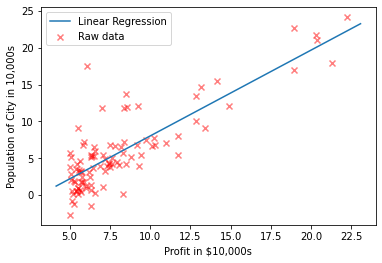

In [8]:
# Scatter plot

plt.scatter(X[:,1],y, c='red', marker='x', alpha=.5);
plt.xlabel("Profit in $10,000s");
plt.ylabel("Population of City in 10,000s");

# Add linear regression line

axes = plt.gca()
x_vals = np.array(axes.get_xlim());
y_vals = final_theta[0] + final_theta[1] * x_vals;
plt.plot(x_vals, y_vals, '-');
plt.legend(["Linear Regression", "Raw data"]);

# Visualizing J(theta)

To understand the cost function J(θ) better, you will now plot the cost over a 2-dimensional grid of θ0 and θ1 values. 

You will not need to code anything new for this part, but you should understand how the code you have written already is creating these images.

The purpose of these graphs is to show you that how J(θ) varies with changes in θ0 and θ1. 

The cost function J(θ) is bowl-shaped and has a global mininum. (This is easier to see in the contour plot than in the 3D surface plot). 

This minimum is the optimal point for θ0 and θ1, and each step of gradient descent moves closer to this point.

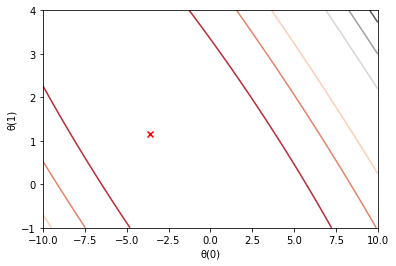

In [9]:
# Search space

theta0_vals = np.linspace(-10, 10, 100);
theta1_vals = np.linspace(-1, 4, 100);

# Prepare data for contour plot

plt_x, plt_y = np.meshgrid(theta0_vals, theta1_vals)
plt_z = j_vals = list()
for i in theta0_vals:
    for j in theta1_vals:
        j_vals.append(compute_cost(X, y, np.array([i, j]).reshape(-1,1)))
plt_z = np.array(j_vals).reshape(len(theta0_vals), len(theta1_vals))

# Contour plot

plt.contour(plt_x, plt_y, plt_z, cmap='RdGy');
plt.scatter(final_theta[0], final_theta[1], c='red', marker='x');
plt.xlabel("θ(0)");
plt.ylabel("θ(1)");

# Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. 

Suppose you are selling your house and you want to know what a good market price would be. 

One way to do this is to first collect information on recent houses sold and make a model of housing prices.

In [10]:
# Read data
data = pd.read_csv('./ex1data2.txt', header=None)

# Prepare data
X, y = data.iloc[:,0:-1], data.iloc[:,-1]
m = len(y)
n = data.shape[1] - 1
X, y = np.array(X).reshape(-1, n), np.array(y).reshape(-1, 1)

## Feature normalization

The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within ±2 standard deviations of the mean)

This is an alternative to taking the range of values (max-min). 

What you will do
- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

In [11]:
def normalize(X):
    '''
    normalize feature in X based on each column mean and standard deviation.
    '''
    mean = np.mean(X, axis=0)
    std = np.std(X)
    res = (X - mean) / std
    return res, (mean, std)

Implementation Note: When normalizing the features, it is important to store the values used for normalization - the mean value and the standard deviation used for the computations. 

After learning the parameters from the model, we often want to predict the prices of houses we have not seen before. 

Given a new x value (living room area and number of bed- rooms), we must first normalize x using the mean and standard deviation that we had previously computed from the training set.

In [12]:
# Normalize data - keep mean, and standard deviation for scaling new data.
X_norm, (mean_norm, std_norm) = normalize(X)

# Add constant value to X
X_norm = np.concatenate((np.ones(m).reshape(-1,1), X_norm), axis=1)

## Gradient descent

Previously, you implemented gradient descent on a univariate regression problem. 

The only difference now is that there is one more feature in the matrix X. 

The hypothesis function and the batch gradient descent update rule remain unchanged.

In [13]:
theta = np.zeros(n+1).reshape(-1,1)
alpha = 0.01
iteration = 10_000

final_theta, cost_hist = gradient_descent(X_norm, y, theta, iteration, learning_rate=alpha)

### Cost values in each iteration 

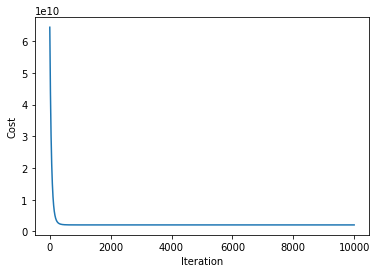

In [14]:
plt.plot(cost_hist);
plt.xlabel("Iteration");
plt.ylabel("Cost");

In [15]:
print(f'Theta computed from gradient descent: \n{final_theta}');

Theta computed from gradient descent: 
[[ 3.40412660e+05]
 [ 1.53769621e+05]
 [-2.14955813e+02]]


In [16]:
new_x = np.array([1650,3]).reshape(-1,n)
new_x_norm = (new_x - mean_norm) / std_norm
new_x_norm = np.concatenate((np.ones(new_x.shape[0]).reshape(-1,1), new_x_norm), axis=1)

pred1 = np.matmul(new_x_norm, final_theta)
print(f'The prediction price for the house with area 1650 m2 and 3 bed rooms is : ${pred1[0][0]:,.2f}');

The prediction price for the house with area 1650 m2 and 3 bed rooms is : $293,237.21


## Select learning rate

If you picked a learning rate within a good range. 

If your graph looks very different, especially if your value of J(θ) increases or even blows up, adjust your learning rate and try again. 

We recommend trying values of the learning rate α on a log-scale, at multiplicative steps of about 3 times the previous value (i.e., 0.3, 0.1, 0.03, 0.01 and so on). 

You may also want to adjust the number of iterations you are running if that will help you see the overall trend in the curve.

In [17]:
iteration = 500
alpha = [.3,.1,.03,.01,.003,.001,.0003,.0001,.00003,.00001]
res = pd.DataFrame()

for a in alpha:

    theta = np.zeros(n+1).reshape(-1,1)
    theta, cost_hist = gradient_descent(X_norm, y, theta, iteration, learning_rate=a)
    _res = pd.DataFrame(cost_hist, columns=[a])
    res = pd.concat([res, _res],axis=1)

Notice the changes in the convergence curves as the learning rate changes. 

With a small learning rate, you should find that gradient descent takes a very long time to converge to the optimal value. 

Conversely, with a large learning rate, gradient descent might not converge or might even diverge!

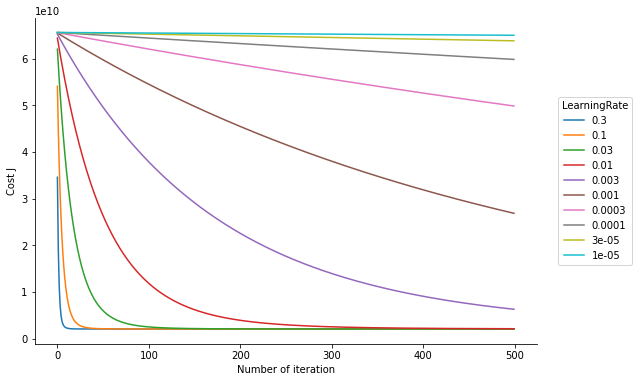

In [18]:
fig, ax = plt.subplots(figsize=(9,6))
res.plot(ax=ax);
plt.xlabel('Number of iteration');
plt.ylabel('Cost J');
plt.legend(loc='right',title='LearningRate',bbox_to_anchor=(1.2,.5));
sns.despine();

# Normal equation

In the lecture videos, you learned that the closed-form solution to linear regression is

theta = inverse(transpose(X)X)transpose(X)y

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent.

Remember that while you don’t need to scale your features, we still need to add a column of 1’s to the X matrix to have an intercept term (θ0).

In [19]:
# Add constant column to X features
X_const = np.concatenate((np.ones(m).reshape(-1,1), X), axis=1)

# Calculate theta from closed-form solution
xt_x = np.matmul(np.transpose(X_const), X_const)
inv_xt_x = np.linalg.inv(xt_x)
xt_y = np.matmul(np.transpose(X_const), y)
theta = np.matmul(inv_xt_x, xt_y)

Now, once you have found θ using this method, use it to make a price prediction for a 1650-square-foot house with 3 bedrooms. 

You should find that gives the same predicted price as the value you obtained using the model fit with gradient descent 

In [20]:
new_x = np.array([1650,3]).reshape(-1,n)
new_x = np.concatenate((np.ones(new_x.shape[0]).reshape(-1,1), new_x), axis=1)

pred1 = np.matmul(new_x, theta)
print(f'The prediction price for the house with area 1650 m2 and 3 bed rooms is : ${pred1[0][0]:,.2f}');

The prediction price for the house with area 1650 m2 and 3 bed rooms is : $293,081.46
